# Visualizing EM Data and Segmentation

This notebook allows you to visualize and explore the TIFF files generated by `extract_tiff.py`.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from IPython.display import clear_output
import ipywidgets as widgets

## Load the TIFF files

In [7]:
# Load the raw EM data and segmentation
raw_data = io.imread('output/em_data_highres.tif')
segmentation = io.imread('output/segmentation_highres.tif')

print(f"Raw data shape: {raw_data.shape}, dtype: {raw_data.dtype}")
print(f"Segmentation shape: {segmentation.shape}, dtype: {segmentation.dtype}")

Raw data shape: (20, 171, 171), dtype: uint8
Segmentation shape: (20, 171, 171, 3), dtype: uint8


## Basic Visualization of a Single Slice

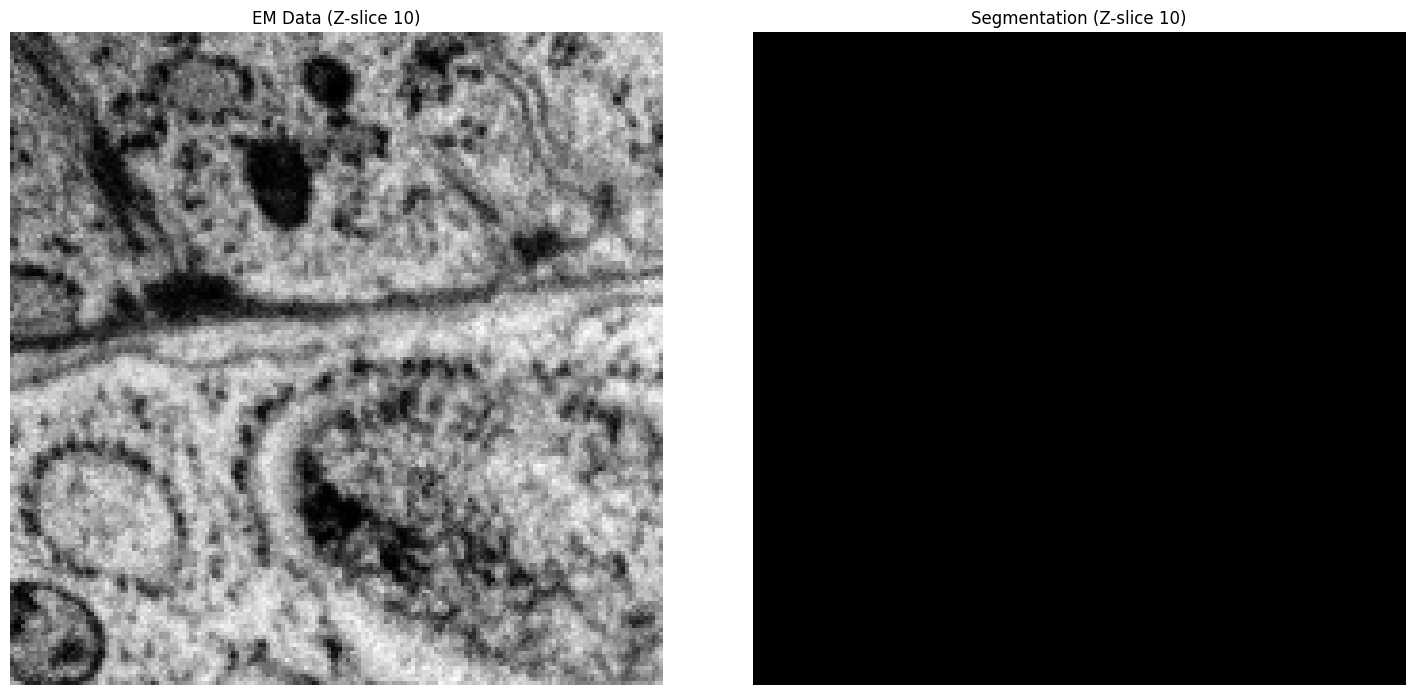

In [ ]:
# Display a middle slice
z_idx = raw_data.shape[0] // 2

fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Show raw EM data
axes[0].imshow(raw_data[z_idx], cmap='gray')
axes[0].set_title(f'EM Data (Z-slice {z_idx})')
axes[0].axis('off')

# Show segmentation
axes[1].imshow(segmentation[z_idx])
axes[1].set_title(f'Segmentation (Z-slice {z_idx})')
axes[1].axis('off')

plt.tight_layout()
plt.show()

## Interactive Visualization

Use the slider to explore different z-slices.

In [ ]:
def plot_slice(z):
    clear_output(wait=True)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))
    
    # Show raw EM data
    axes[0].imshow(raw_data[z], cmap='gray')
    axes[0].set_title(f'EM Data (Z-slice {z})')
    axes[0].axis('off')
    
    # Show segmentation
    axes[1].imshow(segmentation[z])
    axes[1].set_title(f'Segmentation (Z-slice {z})')
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()
    return fig

# Create a slider widget
z_slider = widgets.IntSlider(
    value=raw_data.shape[0]//2,
    min=0,
    max=raw_data.shape[0]-1,
    step=1,
    description='Z-slice:',
    continuous_update=False
)

widgets.interactive(plot_slice, z=z_slider)

## Overlay Visualization

In [ ]:
def plot_overlay(z, alpha=0.5):
    clear_output(wait=True)
    
    plt.figure(figsize=(10, 10))
    
    # Normalize raw data for better visualization
    raw_slice = raw_data[z].astype(float)
    raw_slice = (raw_slice - raw_slice.min()) / (raw_slice.max() - raw_slice.min())
    
    # Display raw data with segmentation overlay
    plt.imshow(raw_slice, cmap='gray')
    plt.imshow(segmentation[z], alpha=alpha)
    plt.title(f'EM Data with Segmentation Overlay (Z-slice {z})')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Create interactive widgets
overlay_slider = widgets.interactive(
    plot_overlay,
    z=widgets.IntSlider(value=raw_data.shape[0]//2, min=0, max=raw_data.shape[0]-1, description='Z-slice:'),
    alpha=widgets.FloatSlider(value=0.5, min=0, max=1, step=0.05, description='Transparency:')
)

overlay_slider

## 3D Visualization (Optional)

For more advanced 3D visualization, you can use libraries like `napari` or `plotly`.
This example uses plotly for a simple 3D volume rendering.

In [ ]:
# Uncomment and run this if you need to install plotly
# !pip install plotly

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a 3D volume rendering - downsampling if needed for performance
# This may be slow for large volumes
def create_volume_fig(volume, colorscale='gray', opacity=0.1):
    # Normalize data to 0-1 range
    v_norm = (volume.astype(float) - volume.min()) / (volume.max() - volume.min())
    
    # Create the 3D volume
    fig = go.Figure(data=go.Volume(
        x=np.arange(v_norm.shape[2]),
        y=np.arange(v_norm.shape[1]),
        z=np.arange(v_norm.shape[0]),
        value=v_norm.flatten(),
        opacity=opacity,
        colorscale=colorscale,
        surface_count=20,  # Increase for better quality, decrease for speed
        caps=dict(x_show=False, y_show=False, z_show=False)
    ))
    
    fig.update_layout(
        title='3D Volume Rendering',
        width=800,
        height=800,
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z',
            aspectmode='data'
        )
    )
    
    return fig

# Try rendering the raw data (might be slow for large volumes)
# You may need to downsample for better performance
downsampled_raw = raw_data[::2, ::2, ::2] if raw_data.size > 10**7 else raw_data
create_volume_fig(downsampled_raw)